In [1]:
    import pandas as pd
import os

In [1092]:
config = {
    'BASE_PATH': '/home/duc-softzone/IS403-FinalProject/data',
    'MODEL': {
            'PREDICT_STEP': 1,
            'INTERVAL': 1,
            'WINDOW_SIZE': 24
        },
}
scenarios = ['7:3', '8:2', '9:1']
problems = ['1d', '30d', '60d', '90d']

## Import and preprocess data

In [956]:
dirlist = os.listdir(config['BASE_PATH'])
dirlist = list(filter(lambda x: 'USDT' in x and 'final' not in x, dirlist))
dirlist

['ETH_USDT.csv', 'BNB_USDT.csv', 'BTC_USDT.csv']

In [1158]:
df_dict = {}
for filename in dirlist:
    data = pd.read_csv(os.path.join(config['BASE_PATH'], filename))
    data.drop(['Symbol', 'Volume USDT', 'tradecount'], axis=1, inplace=True)
    data.columns = ['Date', 'O', 'H', 'L', 'C', 'V']
    data.sort_values(by='Date', inplace=True)
    data.set_index('Date', inplace=True)
    df_dict[filename.replace('.csv', '')] = data
df_dict.keys()

dict_keys(['ETH_USDT', 'BNB_USDT', 'BTC_USDT'])

In [958]:
crypto_list = list(df_dict.keys())
crypto_list

['ETH_USDT', 'BNB_USDT', 'BTC_USDT']

## Descriptive Statistics

### ETH_USDT

In [6]:
df_dict[crypto_list[0]].describe()

,O,H,L,C,V
count,53988.000000,53988.000000,53988.000000,53988.000000,53988.000000
mean,1175.631727,1183.056449,1167.680577,1175.651606,22923.639789
std,1117.717598,1124.476871,1110.439730,1117.713576,27800.135759
min,82.160000,82.950000,81.790000,82.170000,0.000000
25%,231.600000,233.000000,230.205000,231.610000,7006.929360
50%,687.525000,693.905000,680.025000,687.510000,14594.333610
75%,1815.000000,1822.552500,1807.150000,1814.967500,28549.662597
max,4846.940000,4868.000000,4833.190000,4846.710000,493227.882820


### BNB_USDT

In [7]:
df_dict[crypto_list[1]].describe()

,O,H,L,C,V
count,52052.000000,52052.000000,52052.000000,52052.000000,5.205200e+04
mean,163.595870,164.569936,162.517056,163.594486,7.875910e+04
std,176.200779,177.280759,174.974360,176.194789,9.708404e+04
min,1.300000,1.500100,0.500000,1.370000,0.000000e+00
25%,15.170000,15.287150,15.068950,15.173300,2.136953e+04
50%,31.340950,31.596350,31.115600,31.349500,4.968572e+04
75%,303.200000,304.800000,301.500000,303.170000,1.021994e+05
max,684.220000,691.770000,675.740000,684.220000,2.002899e+06


### BTC_USDT

In [8]:
df_dict[crypto_list[2]].describe()

,O,H,L,C,V
count,53988.000000,53988.000000,53988.000000,53988.000000,53988.000000
mean,20340.186699,20446.873059,20227.021767,20340.629958,3106.993845
std,15829.707450,15915.568313,15738.935921,15829.602006,4394.971369
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000
25%,7803.670000,7856.090000,7750.000000,7804.950000,971.276882
50%,13128.195000,13250.005000,13000.000000,13128.830000,1706.118517
75%,29433.650000,29507.120000,29375.062500,29433.655000,3351.395208
max,68635.120000,69000.000000,68451.190000,68633.690000,137207.188600


## EDA

### Insights plotting

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_insights(df_dict):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(2, 1, 1)
    for crypto, df in df_dict.items():
        plt.plot(df.index, df['C'], label=crypto)
    plt.title('Close Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    for crypto, df in df_dict.items():
        plt.plot(df.index, df['V'], label=crypto)
    plt.title('Trading Volumes')
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.xticks(rotation=90)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

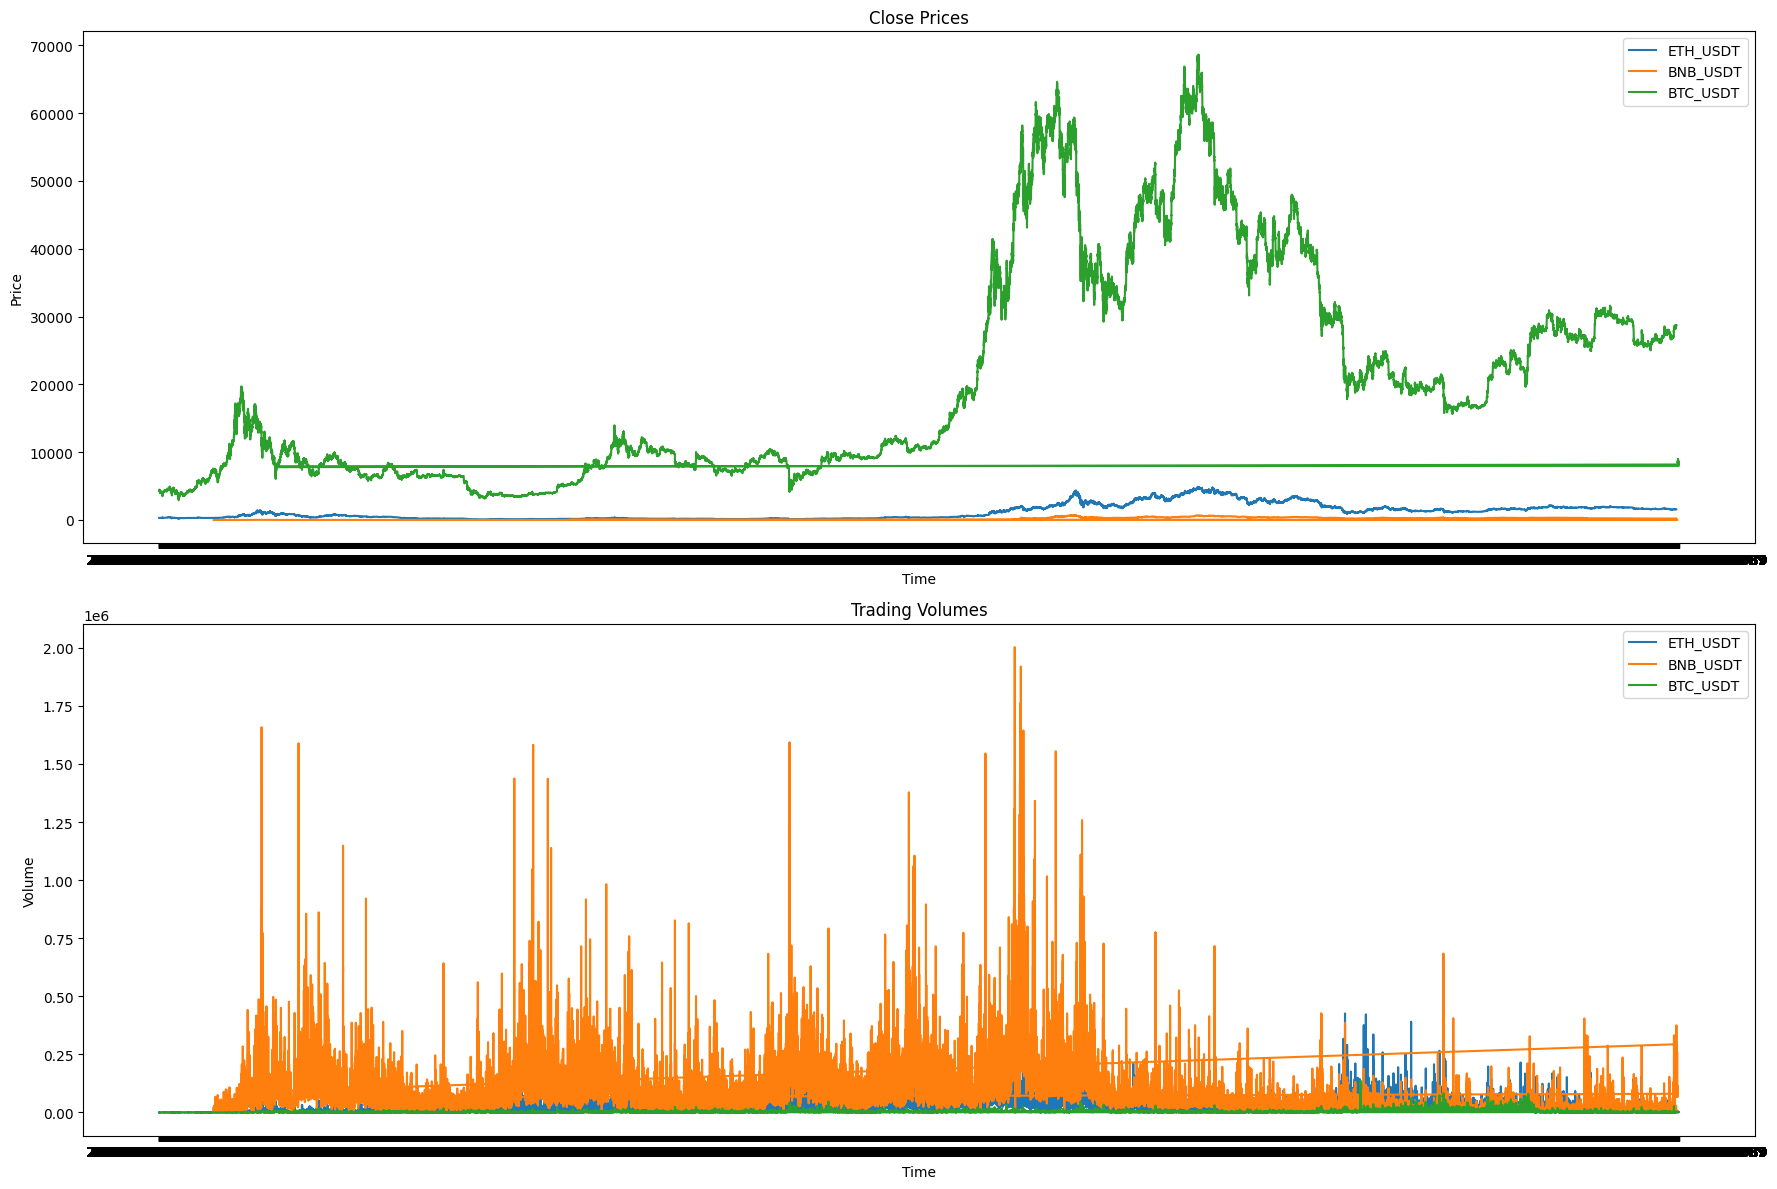

In [14]:
plot_insights(df_dict)

- Close Prices:
  + Stability: ETH/USDT and BNB/USDT show more stable price movements with less volatility compared to BTC/USDT.
  + Volatility: BTC/USDT demonstrates high volatility with significant peaks and valleys, indicating higher risk and potential for substantial gains or losses over short periods.
  + Scale: The price scale of BTC/USDT is much larger than that of ETH/USDT and BNB/USDT, reflecting the higher value and market interest in Bitcoin compared to Ethereum and Binance Coin.
- Volumes:
  + Volume Levels: BNB/USDT has the highest trading volumes among the three pairs, followed by BTC/USDT and then ETH/USDT.
  + Volatility: BNB/USDT shows the highest volatility in trading volumes, with large and frequent spikes. ETH/USDT and BTC/USDT display more stable and lower trading volumes.
  + Market Activity: The graph indicates that BNB/USDT is the most actively traded pair among the three, with consistently high trading volumes over the observed period. BTC/USDT and ETH/USDT, while still active, show less extreme trading volumes.

### Histograms plotting

In [10]:
def plot_histograms(df_dict):
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(18, 6))
    
    for i, (crypto, df) in enumerate(df_dict.items(), start=1):
        plt.subplot(1, len(df_dict), i)
        sns.histplot(df['C'], kde=True, bins=30)
        plt.title(f'{crypto} Close Price Distribution')
        plt.xlabel('Close Price')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()



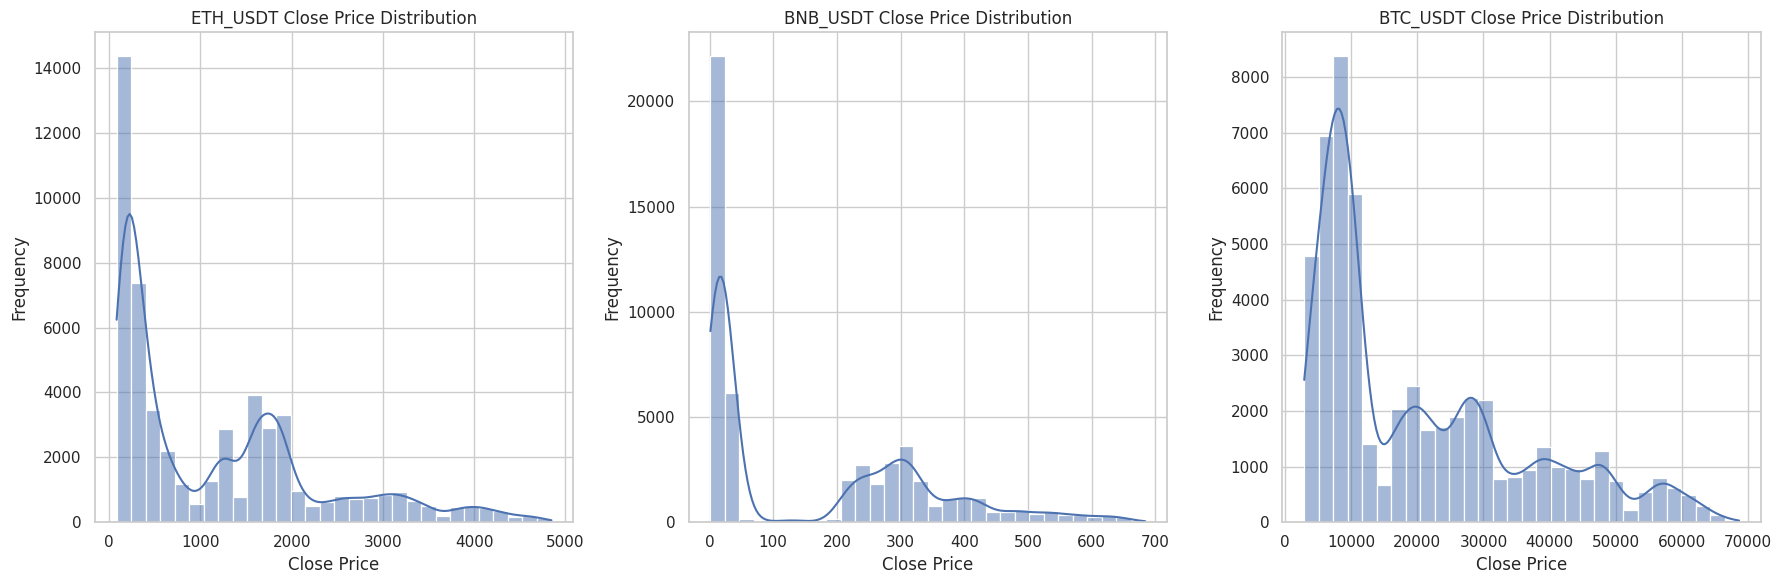

In [11]:
plot_histograms(df_dict)

- ETH_USDT: shows a high frequency of prices below 500 USDT, with a sharp peak at the lower end. The distribution rapidly decreases as the close price increases, indicating that most ETH/USDT trades happen at lower price ranges.
- BNB_USDT: shows a high frequency of prices below 100 USDT, with a sharp peak at the lower end. The distribution rapidly decreases as the close price increases, with occasional higher frequencies at around 300 and 400 USDT. This indicates that most BNB/USDT trades happen at lower price ranges, with some activity at higher prices.
- BTC_USD: shows a high frequency of prices below 10,000 USDT, with a sharp peak at the lower end. The distribution shows multiple peaks at different price ranges (e.g., around 10,000, 20,000, 30,000, 40,000 USDT), indicating varied levels of activity across a wider range of prices. This suggests a more complex trading pattern for BTC/USDT with significant trading volume at multiple price levels.

$\Rightarrow$ All three histograms exhibit a right-skewed distribution, with the majority of trading activity concentrated at the lower end of the price spectrum.

$\Rightarrow$ The ETH/USDT and BNB/USDT trading pairs show a sharp decline in frequency as the close price increases, whereas the BTC/USDT pair shows more distributed peaks across higher prices.

In [589]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_trend_seasonal(df_dict, freq=24 * 90):
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(18, 12))
    
    for i, (crypto, df) in enumerate(df_dict.items(), start=1):
        result = seasonal_decompose(df['C'], model='additive', period=freq)
        
        plt.subplot(len(df_dict), 3, 3*(i-1)+1)
        result.trend.plot(ax=plt.gca())
        plt.title(f'{crypto} Trend')
        plt.xlabel('Time')
        plt.ylabel('Trend')
        plt.xticks(rotation=45)

        plt.subplot(len(df_dict), 3, 3*(i-1)+2)
        result.seasonal.plot(ax=plt.gca())
        plt.title(f'{crypto} Seasonal')
        plt.xlabel('Time')
        plt.ylabel('Seasonal')
        plt.xticks(rotation=45)

        plt.subplot(len(df_dict), 3, 3*(i-1)+3)
        result.resid.plot(ax=plt.gca())
        plt.title(f'{crypto} Residual')
        plt.xlabel('Time')
        plt.ylabel('Residual')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

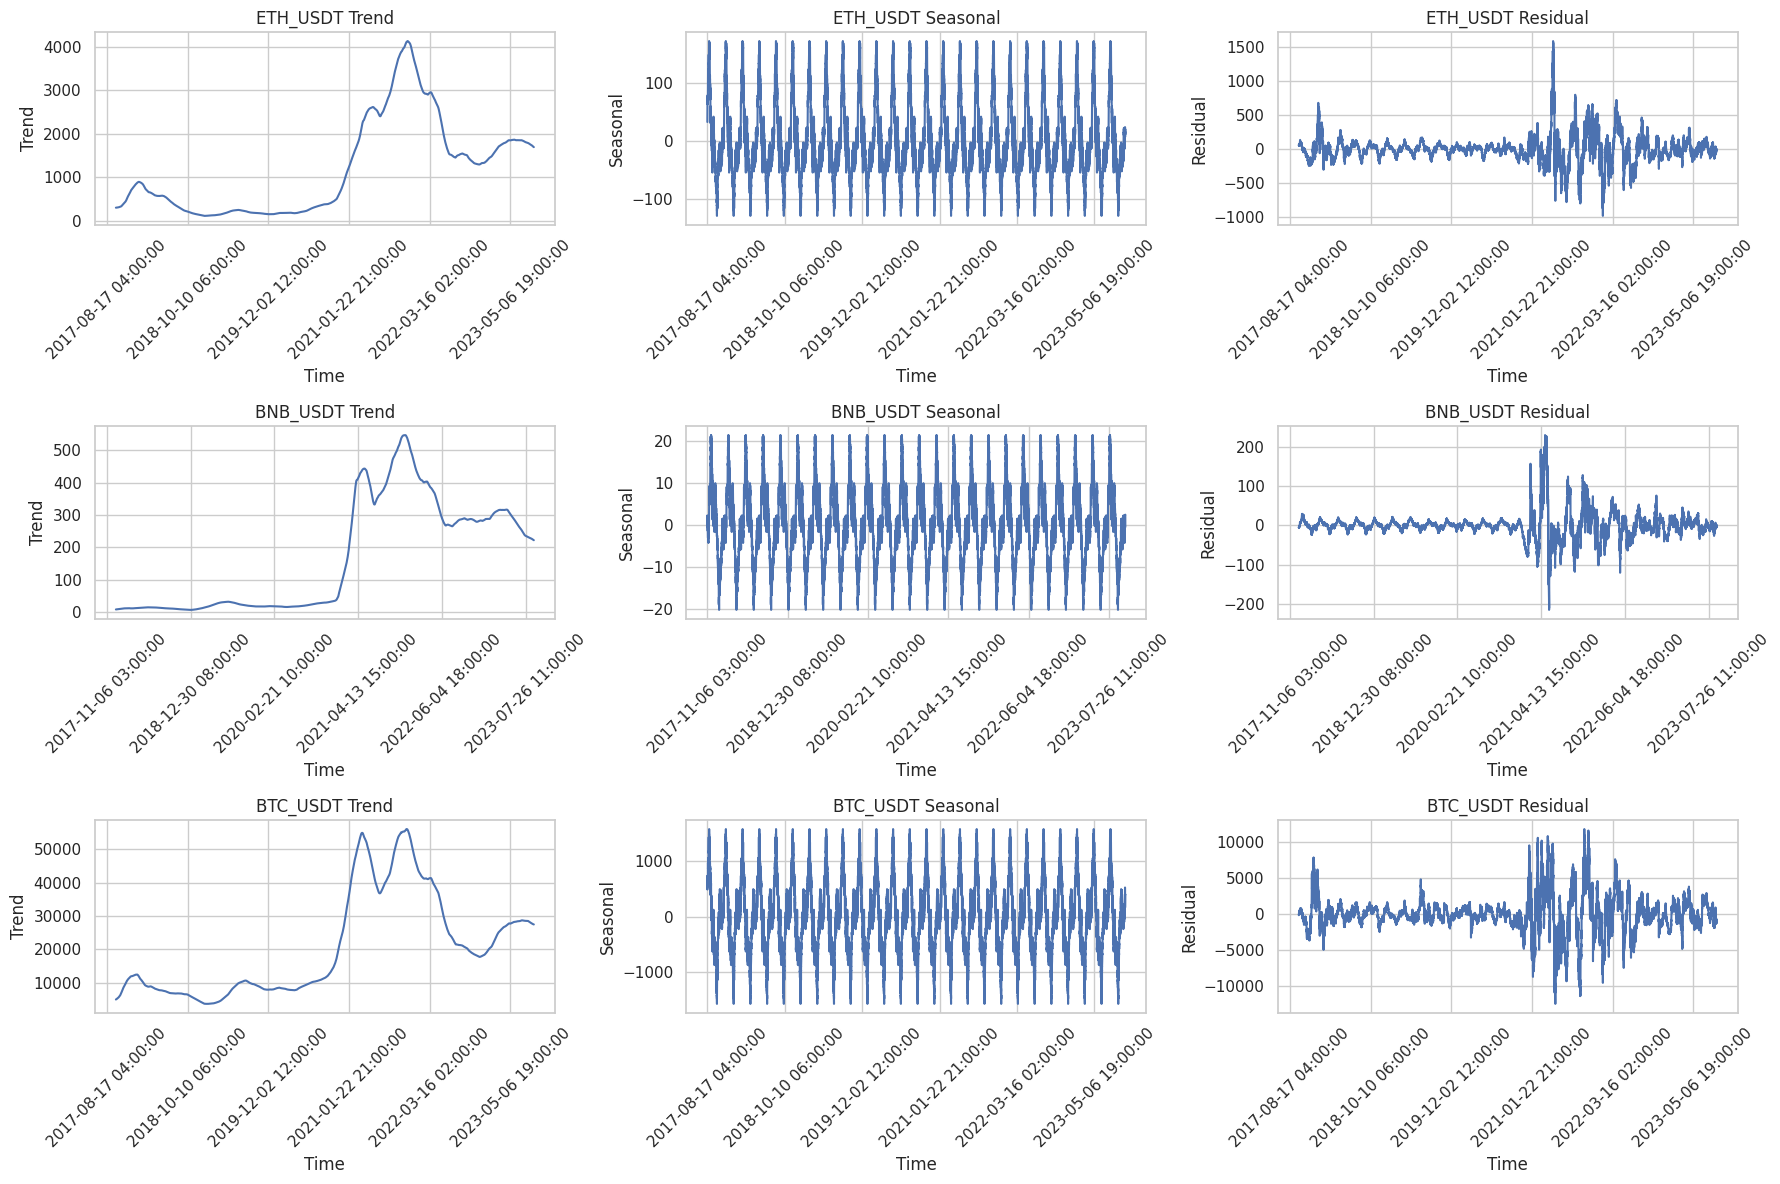

In [590]:
plot_trend_seasonal(df_dict)

- ETH_USDT:
  + Trend:
    + There is an initial slight increase in the trend, followed by a relatively stable period.
    + Around late 2020 to early 2022, there is a significant increase in the trend, indicating a substantial rise in the ETH price, peaking around early 2022.
    + After reaching the peak, the trend shows a sharp decline, stabilizing at a lower level towards the end of the series.
  + Seasonal:
    + The plot reveals a clear cyclical pattern that repeats approximately every 24 periods, which is consistent with daily seasonality given the hourly data.
    + This indicates that there are daily fluctuations in the ETH price, with regular peaks and troughs within each day.
  + Residual:
    + The residual component represents the noise or irregular fluctuations in the data that are not explained by the trend or seasonal components.
    + The residual plot shows relatively low fluctuation in the earlier part of the series.
    + Around early 2022, coinciding with the peak in the trend, the residuals exhibit higher volatility, indicating greater unpredictability in the price during this period.
    + Towards the end of the series, the residual fluctuations decrease, suggesting a return to more stable conditions.
- BNB_USDT:
  + Trend:
    + Initially, the trend is relatively flat with minor fluctuations up until late 2020.
    + Around early 2021, there is a significant and rapid increase in the trend, indicating a substantial rise in the BNB price.
    + The trend reaches a peak around mid-2021, followed by some fluctuations and a slight decline towards the end of the series.
    + This suggests a major upward movement in BNB's price in early 2021, likely influenced by market events, followed by stabilization and a gradual decrease.
  + Seasonal:
    + The plot reveals a clear cyclical pattern that repeats approximately every 24 periods, which is consistent with daily seasonality given the hourly data.
    + This indicates that there are daily fluctuations in the BNB price, with regular peaks and troughs within each day.
  + Residual:
    + The residual component represents the noise or irregular fluctuations in the data that are not explained by the trend or seasonal components.
    + The residual plot shows relatively low fluctuations in the earlier part of the series, indicating stable conditions.
    + Around early 2021, coinciding with the rapid increase in the trend, the residuals exhibit higher volatility, indicating greater unpredictability in the price during this period.
    + Towards the end of the series, the residual fluctuations decrease, suggesting a return to more stable conditions.
- BTC_USDT:
  + Trend:
    + The trend component highlights the long-term movement of the time series.
    + There is an initial increase in the trend, followed by a relatively stable period with minor fluctuations until late 2020.
    + Around late 2020 to early 2021, there is a significant and rapid increase in the trend, indicating a substantial rise in the BTC price.
    + The trend reaches its peak around early to mid-2021, followed by a decline and some stabilization towards the end of the series.
    + This suggests a major upward movement in BTC's price around late 2020 to early 2021, likely influenced by market events, followed by a decline and stabilization.
  + Seasonal:
    + The seasonal component captures repeating short-term patterns in the data.
    + The plot reveals a clear cyclical pattern that repeats approximately every 24 periods, which is consistent with daily seasonality given the hourly data.
    + This indicates that there are daily fluctuations in the BTC price, with regular peaks and troughs within each day.
  + Residual:
    + The residual component represents the noise or irregular fluctuations in the data that are not explained by the trend or seasonal components.
    + The residual plot shows relatively low fluctuations in the earlier part of the series, indicating stable conditions.
    + Around early 2021, coinciding with the rapid increase in the trend, the residuals exhibit higher volatility, indicating greater unpredictability in the price during this period.
    + Towards the end of the series, the residual fluctuations continue but with somewhat reduced intensity compared to the peak period.

### Box plottings

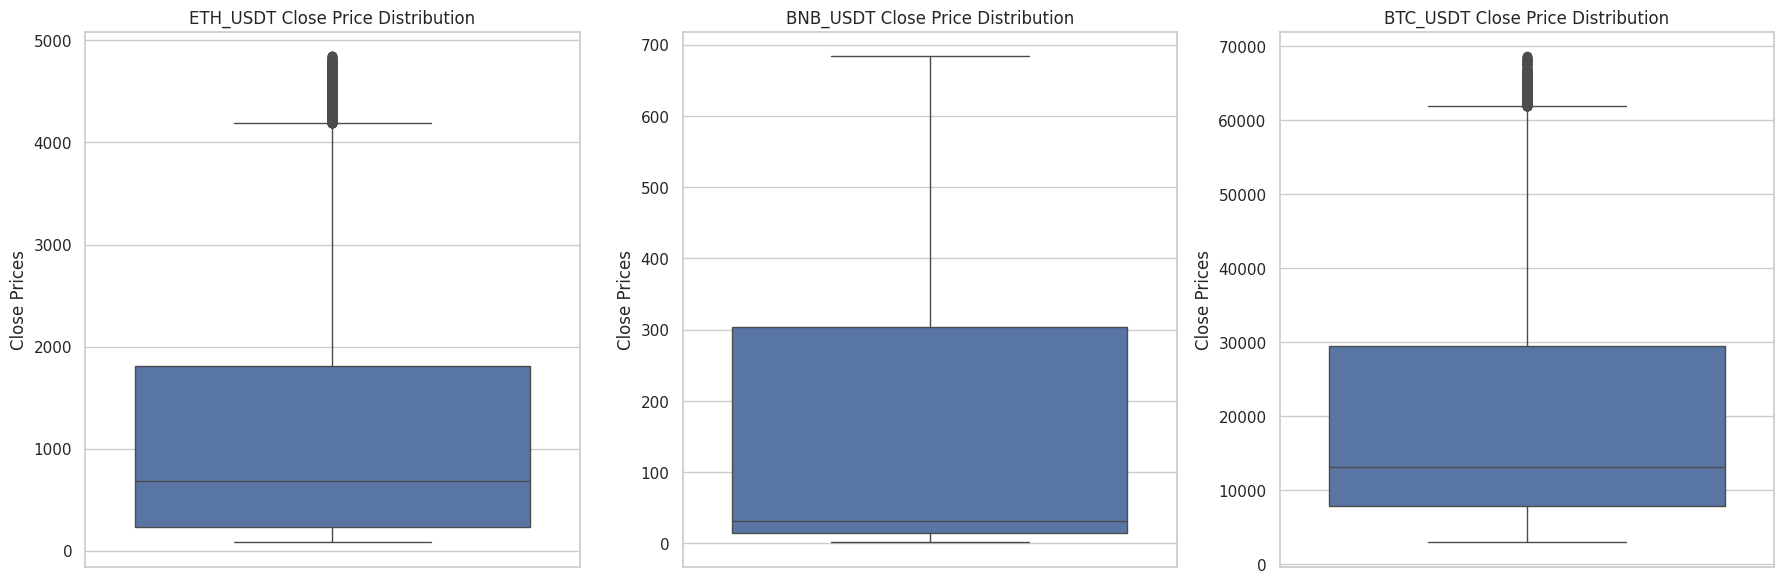

In [14]:
def plot_boxplots(df_dict):
    cols = len(df_dict)

    plt.figure(figsize=(cols * 6, 6))
    
    for i, (crypto, df) in enumerate(df_dict.items(), start=1):
        plt.subplot(1, cols, i)
        sns.boxplot(y=df['C'])
        plt.title(f'{crypto} Close Price Distribution')
        plt.ylabel('Close Prices')
    
    plt.tight_layout()
    plt.show()

plot_boxplots(df_dict)


- ETH_USDT:
  + Median: The closing price shows a distribution with a median above 1000 USDT.
  + IQR: The bulk of the data points fall within a relatively narrow IQR, ranging from approximately 200 to 2000 USDT.
  + Outliers: There are several outliers above the upper whisker, indicating occasional close prices that are significantly higher than the typical range.
- BNB_USDT:
  + Median: Displays a lower median closing price compared to ETH_USDT, around 100 USDT.
  + IQR: The IQR is wider, ranging from about 50 to 300 USDT, suggesting more variability in the close price.
  + Outliers: Similar to ETH_USDT, BNB_USDT also exhibits outliers that are well above the typical price range, extending up to approximately 700 USDT.
- BTC_USDT:
  + Median: Has a substantially higher median closing price compared to the other two cryptocurrencies, around 10,000 USDT.
  + IQR: The IQR is wider, ranging from about 5000 to 30,000 USDT, indicating greater price variability.
  + Outliers: The distribution of BTC_USDT close prices has several outliers, particularly above the upper whisker, indicating occasional significantly higher prices. There are also a few outliers below the lower whisker.

## Proprocessing

### Remove Outliers: using IQR method with factor = 1.5

In [963]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def remove_outliers(df, factor=1.5):
    Q1 = X['C'].quantile(0.25)
    Q3 = X['C'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    df_filtered = df[~((df['C'] < lower_bound) | (df['C'] > upper_bound))]
    return df_filtered


In [964]:
for crypto, df in df_dict.items():
    df_dict[crypto] = remove_outliers(df)


In [965]:
df_dict['BTC_USDT']

,O,H,L,C,V
Date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2023-10-19 19:00:00,28646.98,28765.76,28645.00,28750.75,1039.209350
2023-10-19 20:00:00,28750.75,28882.07,28684.80,28715.38,1737.147110
2023-10-19 21:00:00,28715.39,28739.73,28604.09,28604.09,1118.516970


### Feature extraction: Using quantitative technique to compute and extract features from Close Prices and Volumes

In [1081]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

class ExtractFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_transformed = pd.DataFrame()
        
        # ses = SimpleExpSmoothing(X['C']).fit(smoothing_level=0.2, optimized=False)
        # X_transformed['C_ses'] = ses.fittedvalues#.shift(-config['MODEL']['PREDICT_STEP'])

        # hw = ExponentialSmoothing(X['C'], trend='add', seasonal='add', seasonal_periods=24).fit()
        # X_transformed['C_hw'] = hw.fittedvalues#.shift(-config['MODEL']['PREDICT_STEP'])

        X_transformed['C_oscillator'] = (X['C'].rolling(window=12 * config['MODEL']['INTERVAL'], min_periods=1).mean() - 
                                         X['C'].rolling(window=23 * config['MODEL']['INTERVAL'], min_periods=1).mean())#.shift(-config['MODEL']['PREDICT_STEP'])
        X_transformed['C_ma_5'] = X['C'].rolling(window=7 * config['MODEL']['INTERVAL']).mean()#.shift(-config['MODEL']['PREDICT_STEP'])
        X_transformed['C_ma_8'] = X['C'].rolling(window=21 * config['MODEL']['INTERVAL']).mean()#.shift(-config['MODEL']['PREDICT_STEP'])
        X_transformed['C_ma_12'] = X['C'].rolling(window=7 * config['MODEL']['INTERVAL']).mean()#.shift(-config['MODEL']['PREDICT_STEP'])
        X_transformed['C_ma_17'] = X['C'].rolling(window=21 * config['MODEL']['INTERVAL']).mean()#.shift(-config['MODEL']['PREDICT_STEP'])
        
        X_transformed['C_lag_1'] = X['C'].shift(config['MODEL']['INTERVAL'] * 1)
        X_transformed['C_lag_3'] = X['C'].shift(config['MODEL']['INTERVAL'] * 3)
        X_transformed['C_lag_6'] = X['C'].shift(config['MODEL']['INTERVAL'] * 6)
        X_transformed['C_lag_9'] = X['C'].shift(config['MODEL']['INTERVAL'] * 9)
        X_transformed['C_lag_12'] = X['C'].shift(config['MODEL']['INTERVAL'] * 12)

        X_transformed['C_roc_1'] = X['C'].pct_change(periods=1 * config['MODEL']['INTERVAL'])#.shift(-config['MODEL']['PREDICT_STEP'])
        X_transformed['C_roc_3'] = X['C'].pct_change(periods=3 * config['MODEL']['INTERVAL'])#.shift(-config['MODEL']['PREDICT_STEP'])
        X_transformed['C_roc_6'] = X['C'].pct_change(periods=6 * config['MODEL']['INTERVAL'])#.shift(-config['MODEL']['PREDICT_STEP'])
        X_transformed['C_roc_9'] = X['C'].pct_change(periods=9 * config['MODEL']['INTERVAL'])#.shift(-config['MODEL']['PREDICT_STEP'])
        X_transformed['C_roc_12'] = X['C'].pct_change(periods=12 * config['MODEL']['INTERVAL'])#.shift(-config['MODEL']['PREDICT_STEP'])

        X_transformed['C_macd'] = (X['C'].ewm(span=12 * config['MODEL']['INTERVAL'], adjust=False).mean() - 
                                   X['C'].ewm(span=23 * config['MODEL']['INTERVAL'], adjust=False).mean())#.shift(-config['MODEL']['PREDICT_STEP'])
        X_transformed['signal_line'] = X_transformed['C_macd'].ewm(span=9 * config['MODEL']['INTERVAL'], adjust=False).mean()#.shift(-config['MODEL']['PREDICT_STEP'])
        
        # X_transformed['ad_line'] = (((X['C'] - X['L']) - (X['H'] - X['C'])) / (X['H'] - X['L']) * X['V']).cumsum()#.shift(-config['MODEL']['PREDICT_STEP'])

        # X_transformed['V_vs_avg'] = (X['V'] / X['V'].rolling(window=20 * config['MODEL']['INTERVAL']).mean())#.shift(-config['MODEL']['PREDICT_STEP'])
        # X_transformed['VWAP'] = ((X['V'] * (X['H'] + X['L'] + X['C']) / 3).cumsum() / X['V'].cumsum())#.shift(-config['MODEL']['PREDICT_STEP'])

        # X_transformed['V_oscillator'] = (X['V'].rolling(window=10 * config['MODEL']['INTERVAL'], min_periods=1).mean() - 
        #                                  X['V'].rolling(window=20 * config['MODEL']['INTERVAL'], min_periods=1).mean())#.shift(-config['MODEL']['PREDICT_STEP'])
        
        X_transformed['C'] = X['C']
        X_transformed.dropna(inplace=True, axis=0)
        
        return X_transformed


In [1082]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

class ColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, transformer, columns):
        self.transformer = transformer
        self.columns = columns

    def fit(self, X, y=None):
        self.transformer.fit(X[self.columns], y)
        return self

    def transform(self, X):
        X_transformed = self.transformer.transform(X[self.columns])
        X_copy = X.copy()
        X_copy[self.columns] = X_transformed
        return X_copy

### Create pipeline for feature extraction, and normalization

In [1083]:
df_final_dict = {}
pipeline_dict = {}
for crypto, df in df_dict.items():
    df = df.apply(pd.to_numeric, errors='coerce')
    feature_columns = ['C_oscillator', 'C_ma_5', 'C_ma_8', 'C_ma_12', 'C_ma_17', 'C_lag_1','C_lag_3','C_lag_6', 'C_lag_9', 'C_lag_12', 'C_roc_1','C_roc_3', 'C_roc_6', 'C_roc_9', 'C_roc_12', 'C_macd', 'signal_line']
    pipeline = Pipeline([
        ('extract_features', ExtractFeatures()),
        # ('remove_outliers', RemoveOutliers()),
        ('normalize', ColumnTransformer(MinMaxScaler(), feature_columns)), 
    ])
    df_transformed = pipeline.fit_transform(df)
    pipeline_dict[crypto] = pipeline
    df_final = pd.DataFrame(df_transformed, columns=['C_oscillator', 'C_ma_5', 'C_ma_8', 'C_ma_12', 'C_ma_17', 'C_lag_1','C_lag_3','C_lag_6', 'C_lag_9', 'C_lag_12', 'C_roc_1','C_roc_3', 'C_roc_6', 'C_roc_9', 'C_roc_12', 'C_macd', 'signal_line', 'C']).reset_index(drop=True)
    df_final.dropna(axis=0, inplace=True)
    df_final_dict[crypto] = df_final
    print(f"{crypto} preprocessed")

ETH_USDT preprocessed
BNB_USDT preprocessed
BTC_USDT preprocessed


## Split data into train, validation and test sets

In [1084]:
def split_data(df_dict, train_ratios=[0.7, 0.8, 0.9]):
    splitted_data = {}
    for crypto, df in df_dict.items():
        trains, tests = [], []
        for train_ratio in train_ratios:
            train_end = int(len(df) * train_ratio)
            train_df = df.iloc[:train_end]
            test_df = df.iloc[train_end:]
            trains.append(train_df)
            tests.append(test_df)
            
        
        splitted_data[crypto] = {'trains': trains, 'tests': tests}
    
    return splitted_data

In [1085]:
splitted_data = split_data(df_final_dict)

In [1086]:
splitted_data['BTC_USDT']['trains'][0].head()

,C_oscillator,C_ma_5,C_ma_8,C_ma_12,C_ma_17,C_lag_1,C_lag_3,C_lag_6,C_lag_9,C_lag_12,C_roc_1,C_roc_3,C_roc_6,C_roc_9,C_roc_12,C_macd,signal_line,C
0,0.542811,0.021151,0.019711,0.021151,0.019711,0.023172,0.023994,0.022695,0.024313,0.025308,0.512574,0.475552,0.520845,0.453228,0.422801,0.556786,0.545855,4286.53
1,0.540330,0.021118,0.019658,0.021118,0.019658,0.023197,0.024049,0.023853,0.024344,0.026122,0.483481,0.457300,0.479182,0.438028,0.392748,0.555287,0.544884,4243.59
2,0.537756,0.020978,0.019619,0.020978,0.019619,0.022468,0.023172,0.024218,0.023243,0.026323,0.527512,0.487159,0.480257,0.468125,0.397014,0.554655,0.543966,4267.59
3,0.536926,0.020846,0.019593,0.020846,0.019593,0.022875,0.023197,0.023994,0.022695,0.024313,0.527949,0.496503,0.494313,0.487896,0.444406,0.554721,0.543247,4292.39
4,0.536086,0.020734,0.019542,0.020734,0.019542,0.023296,0.022468,0.024049,0.023853,0.024344,0.508698,0.512074,0.491452,0.462833,0.442247,0.554741,0.542676,4287.92


In [1031]:
for crypto, df in df_final_dict.items():
    df.reset_index(inplace=True, drop=True)
    df.to_csv(f'data/{crypto}_final.csv', index=None)

In [245]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, Dense, GlobalAveragePooling1D, Dropout

## Training and Testing models

### Prepare data

In [840]:
def prepare_analytics_data(df):
    data = df['C'].values
    return data


In [894]:
def prepare_ml_data(df):
    X = df.drop(columns=['C']).values
    y = df['C'].values
    return np.array(X)[:-config['MODEL']['PREDICT_STEP']], np.array(y)[config['MODEL']['PREDICT_STEP']:]


In [1094]:
def prepare_dl_data(df):
    features = df.drop(columns=['C'])
    target = df['C']
    X = []
    y = []
    for i in range(len(df) - config['MODEL']['WINDOW_SIZE'] - config['MODEL']['PREDICT_STEP']):
        X.append(features.iloc[i:i+config['MODEL']['WINDOW_SIZE']].values)
        y.append(target.iloc[i+config['MODEL']['WINDOW_SIZE']+config['MODEL']['PREDICT_STEP']])
    return np.array(X), np.array(y)

### Evaluation Metrics

In [540]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    wape = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'WAPE': wape,
        'R2': r2
    }

### SES Model

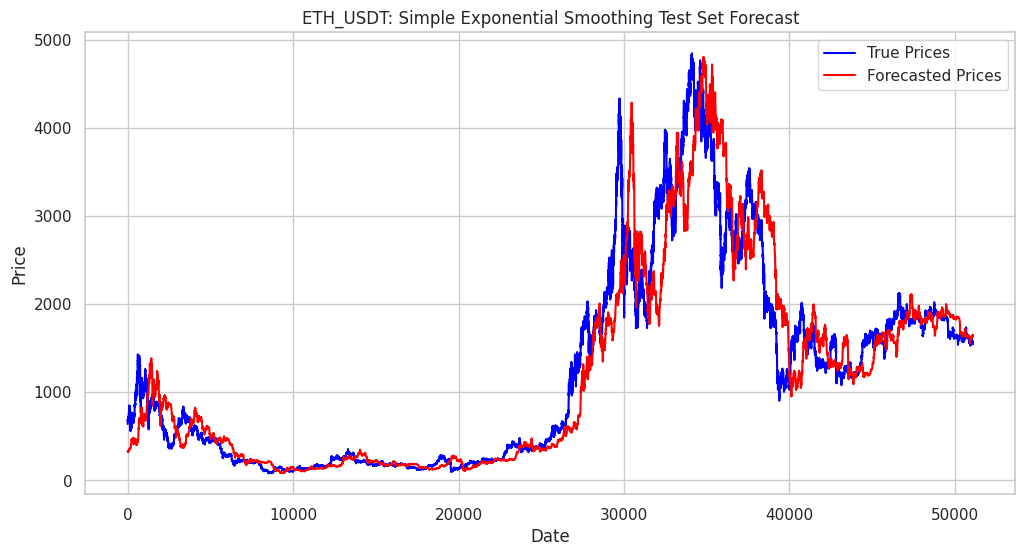

ETH_USDT {'MAE': 244.46213534471923, 'MAPE': 23.213911537801568, 'RMSE': 401.087168112141, 'WAPE': 19.992498937687046, 'R2': 0.8740943505329495}


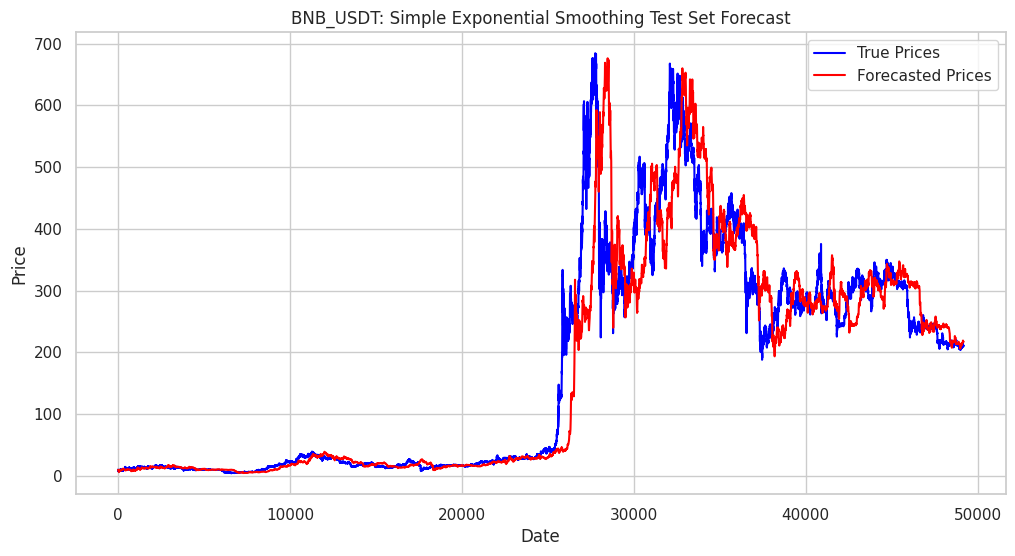

BNB_USDT {'MAE': 33.766109470307725, 'MAPE': 20.365033887496985, 'RMSE': 66.38314232580787, 'WAPE': 19.551074892380292, 'R2': 0.8594780551868738}


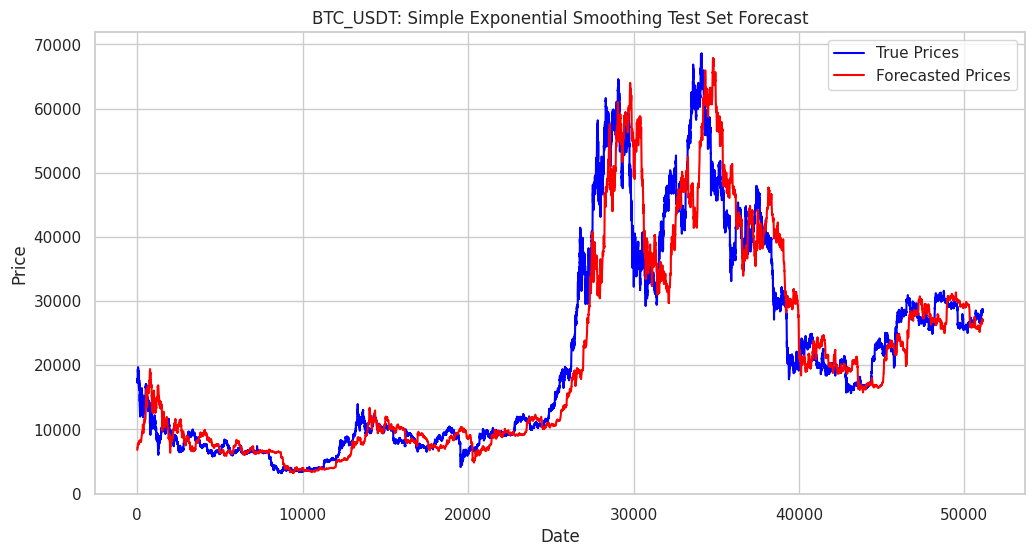

BTC_USDT {'MAE': 3490.3631467810387, 'MAPE': 17.071378158278936, 'RMSE': 5483.447317603767, 'WAPE': 16.525624254938787, 'R2': 0.8810089530145004}


In [616]:
for crypto, df in df_dict.items():
    data = df['C'].values
    
    ses_forecast_test = []
    for t in range(config['MODEL']['WINDOW_SIZE'], len(data) - config['MODEL']['PREDICT_STEP']):
        train = data[t-config['MODEL']['WINDOW_SIZE']:t]
        ses_model_train = SimpleExpSmoothing(train).fit(smoothing_level=0.2, optimized=False)
        pred = ses_model_train.forecast(config['MODEL']['PREDICT_STEP'])[-1]
        ses_forecast_test.append(pred)
    plt.figure(figsize=(12, 6))
    plt.plot(data[config['MODEL']['PREDICT_STEP'] + config['MODEL']['WINDOW_SIZE']:], label='True Prices', color='blue')
    plt.plot(ses_forecast_test, label='Forecasted Prices', color='red')
    plt.title(crypto + ': Simple Exponential Smoothing Test Set Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    print(crypto, eval(data[config['MODEL']['PREDICT_STEP'] + config['MODEL']['WINDOW_SIZE']:], ses_forecast_test))


### HWES Model 

/tmp/ipykernel_2221204/3565331265.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]
/tmp/ipykernel_2221204/3565331265.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


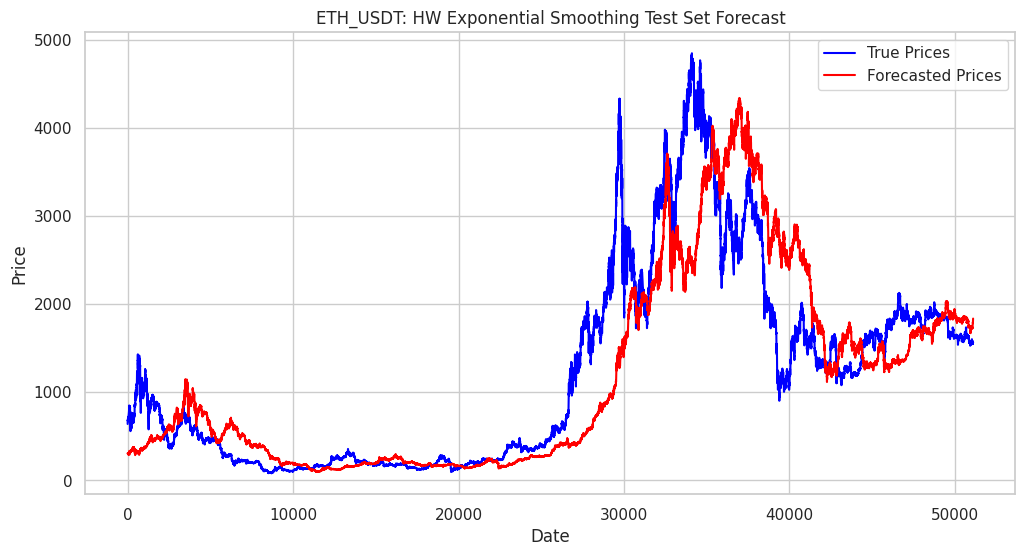

ETH_USDT {'MAE': 398.3642714932795, 'MAPE': 40.02447022253085, 'RMSE': 613.9939717324112, 'WAPE': 32.57885833080573, 'R2': 0.7049498116704156}


/tmp/ipykernel_2221204/3565331265.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]
/tmp/ipykernel_2221204/3565331265.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


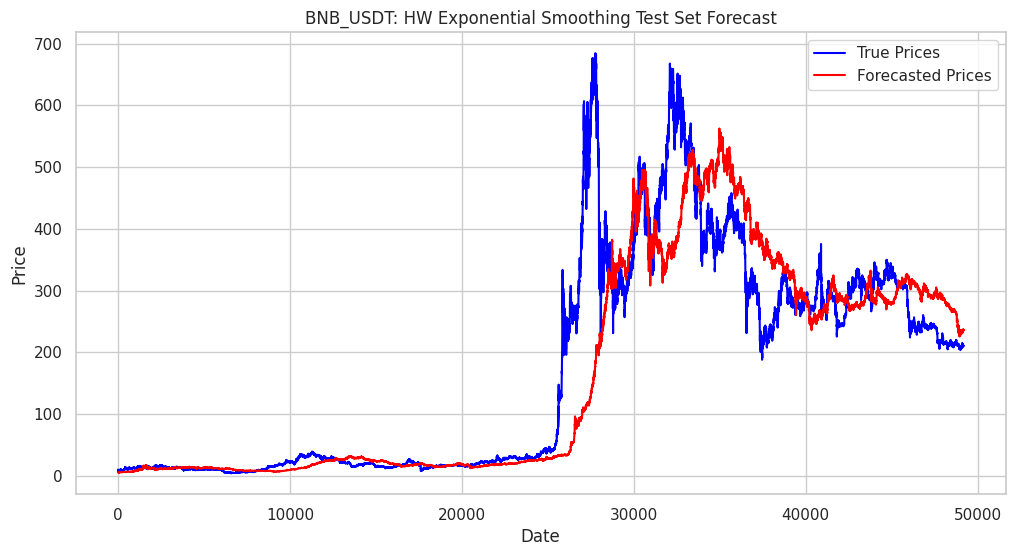

BNB_USDT {'MAE': 43.71416422540152, 'MAPE': 29.225827617831644, 'RMSE': 87.20876270575954, 'WAPE': 25.311145169987142, 'R2': 0.757479313616713}


/tmp/ipykernel_2221204/3565331265.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]
/tmp/ipykernel_2221204/3565331265.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


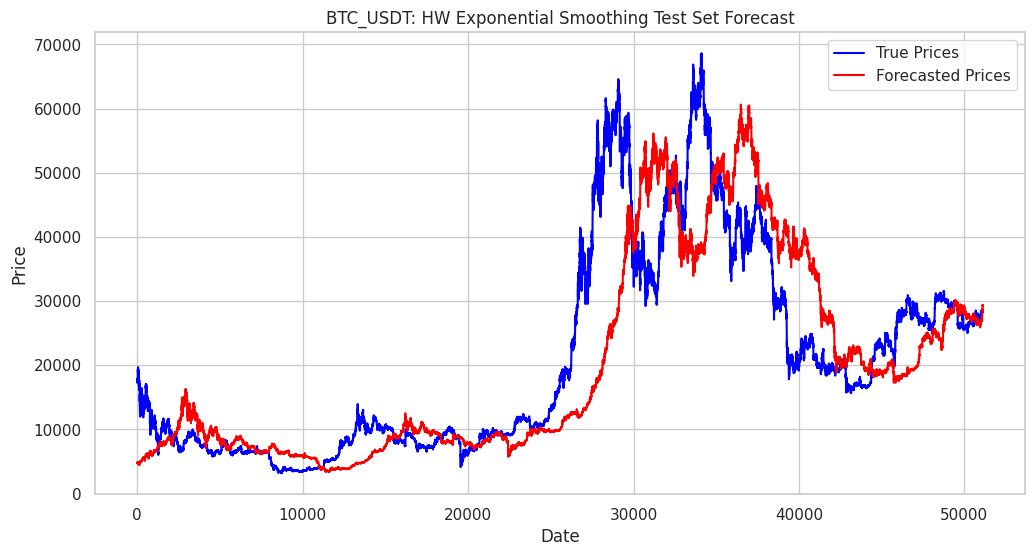

BTC_USDT {'MAE': 6439.989615411685, 'MAPE': 30.680831976613774, 'RMSE': 9902.730090838495, 'WAPE': 30.49105325563352, 'R2': 0.6119239695667955}


In [615]:
import statsmodels.api as sm

def exponential_smoothing(data, alpha, beta, periods):
    n = len(data)
    smoothed_values = [data[0]]
    for i in range(1, n):
        smoothed = alpha * data[i] + (1 - alpha) * (smoothed_values[i - 1] + beta * (data[i] - smoothed_values[i - 1]))
        smoothed_values.append(smoothed)
    forecasted_values = []
    for i in range(1, periods + 1):
        forecasted = alpha * data[-1] + (1 - alpha) * (smoothed_values[-1] + beta * (data[-1] - smoothed_values[-1]))
        forecasted_values.append(forecasted)
        smoothed_values.append(forecasted)
    return forecasted_values
for crypto, df in df_dict.items():
    data = df['C'].values
    returns = (df['C'] - df['C'].shift(1)) / df['C'].shift(1)
    returns = returns.dropna()

    Y = returns
    X = df['C'].shift(1).dropna()
    
    Y = Y.loc[X.index]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    alpha = model.params[0]
    beta = model.params[1]

    hw_forecast_test = []
    for t in range(config['MODEL']['WINDOW_SIZE'], len(data) - config['MODEL']['PREDICT_STEP']):
        train = data[t-config['MODEL']['WINDOW_SIZE']:t]
        pred = exponential_smoothing(train, alpha, beta, config['MODEL']['PREDICT_STEP'])[-1]
        hw_forecast_test.append(pred)
    plt.figure(figsize=(12, 6))
    plt.plot(data[config['MODEL']['WINDOW_SIZE'] + config['MODEL']['PREDICT_STEP']:], label='True Prices', color='blue')
    plt.plot(hw_forecast_test, label='Forecasted Prices', color='red')
    plt.title(crypto + ': HW Exponential Smoothing Test Set Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    print(crypto, eval(data[config['MODEL']['WINDOW_SIZE'] + config['MODEL']['PREDICT_STEP']:], hw_forecast_test))


### ResCNN Model

In [773]:
train_df = splitted_data['BTC_USDT']['trains'][0]
test_df = splitted_data['BTC_USDT']['tests'][0]

In [774]:
X_train, y_train = prepare_dl_data(train_df)
X_test, y_test = prepare_dl_data(test_df)

In [1100]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def residual_block(x, filters, kernel_size=5):
    shortcut = x
    x = Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x
def build_rescnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=128, kernel_size=5, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    for _ in range(6):
        x = residual_block(x, filters=128)
        x = Dropout(0.2)(x)

    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [1110]:
rescnn_models = {}
rescnn_evals = {}
for crypto in splitted_data.keys():
    crypto_evals = {}
    crypto_models = {}
    for i in range(len(scenarios)):
        train_df = splitted_data[crypto]['trains'][i]
        test_df = splitted_data[crypto]['tests'][i]
        X_train, y_train = prepare_dl_data(train_df)
        X_test, y_test = prepare_dl_data(test_df)
        rescnn_model = build_rescnn_model((X_train.shape[1], X_train.shape[2]))
        rescnn_model.compile(optimizer='adam', loss='mse')
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        rescnn_history = rescnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
        predictions_rescnn = rescnn_model.predict(X_test)
        crypto_evals[scenarios[i]] = eval(y_test, predictions_rescnn)
        crypto_models[scenarios[i]] = rescnn_model
    rescnn_models[crypto] = crypto_models
    rescnn_evals[crypto] = crypto_evals
    print(f'Rescnn | {crypto}')
    display(pd.DataFrame(rescnn_evals))

Epoch 1/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - loss: 1199038.3750 - val_loss: 81677.1719
Epoch 2/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 73s 62ms/step - loss: 42534.9375 - val_loss: 66575.2500
Epoch 3/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - loss: 21661.7227 - val_loss: 3292.6782
Epoch 4/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - loss: 12739.3467 - val_loss: 235192.3281
Epoch 5/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - loss: 10299.1699 - val_loss: 3129.9363
Epoch 6/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - loss: 8925.8691 - val_loss: 18651.6855
Epoch 7/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - loss: 6403.5825 - val_loss: 23920.2324
Epoch 8/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - loss: 5961.7388 - val_loss: 45925.2891
Epoch 9/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - loss: 4883.6567 - val_loss: 20752.4590
Epoch 10/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - loss: 5123.1938 - val_loss: 48659.0625
506/506 ━━━━━━━━━━━━━━━

,ETH_USDT
7:3,"{'MAE': 47.76601103275199, 'MAPE': 35.56857441..."
8:2,"{'MAE': 33.85509569614243, 'MAPE': 16.92113480..."
9:1,"{'MAE': 66.46900629221105, 'MAPE': 8.582288884..."


Epoch 1/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 86s 63ms/step - loss: 10283.9004 - val_loss: 1451.6617
Epoch 2/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 71s 62ms/step - loss: 592.5964 - val_loss: 40116.9102
Epoch 3/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - loss: 314.4021 - val_loss: 46.1710
Epoch 4/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 71s 62ms/step - loss: 151.2765 - val_loss: 24.9039
Epoch 5/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 71s 63ms/step - loss: 128.9998 - val_loss: 20.6980
Epoch 6/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 72s 63ms/step - loss: 123.3612 - val_loss: 25.6735
Epoch 7/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - loss: 95.1374 - val_loss: 785.8073
Epoch 8/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - loss: 85.9910 - val_loss: 919.9951
Epoch 9/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 70s 62ms/step - loss: 105.1910 - val_loss: 1862.2098
Epoch 10/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 71s 62ms/step - loss: 76.9288 - val_loss: 867.7069
488/488 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step
Epoch 1/10
1300/13

,ETH_USDT,BNB_USDT
7:3,"{'MAE': 47.76601103275199, 'MAPE': 35.56857441...","{'MAE': 3.4256176017636397, 'MAPE': 23.6347730..."
8:2,"{'MAE': 33.85509569614243, 'MAPE': 16.92113480...","{'MAE': 5.31243277931691, 'MAPE': 16.244206685..."
9:1,"{'MAE': 66.46900629221105, 'MAPE': 8.582288884...","{'MAE': 2.7370034120054774, 'MAPE': 20.0814544..."


Epoch 1/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - loss: 523217856.0000 - val_loss: 547940352.0000
Epoch 2/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 71s 61ms/step - loss: 312838400.0000 - val_loss: 159588144.0000
Epoch 3/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 72s 62ms/step - loss: 90493120.0000 - val_loss: 30039180.0000
Epoch 4/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 72s 62ms/step - loss: 19101026.0000 - val_loss: 12063403.0000
Epoch 5/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - loss: 10668736.0000 - val_loss: 484529.9375
Epoch 6/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - loss: 8111160.0000 - val_loss: 3859449.5000
Epoch 7/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - loss: 7170080.0000 - val_loss: 56876360.0000
Epoch 8/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - loss: 5509333.0000 - val_loss: 23292648.0000
Epoch 9/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - loss: 4391702.5000 - val_loss: 30804094.0000
Epoch 10/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - loss: 37

,ETH_USDT,BNB_USDT,BTC_USDT
7:3,"{'MAE': 47.76601103275199, 'MAPE': 35.56857441...","{'MAE': 3.4256176017636397, 'MAPE': 23.6347730...","{'MAE': 612.7714561707822, 'MAPE': 35.34943801..."
8:2,"{'MAE': 33.85509569614243, 'MAPE': 16.92113480...","{'MAE': 5.31243277931691, 'MAPE': 16.244206685...","{'MAE': 1076.328734746989, 'MAPE': 20.35924796..."
9:1,"{'MAE': 66.46900629221105, 'MAPE': 8.582288884...","{'MAE': 2.7370034120054774, 'MAPE': 20.0814544...","{'MAE': 338.7111654453213, 'MAPE': 7.621584607..."


In [1260]:
for crypto in splitted_data.keys():
    for i in range(len(scenarios)):
        train_df = splitted_data[crypto]['trains'][i]
        test_df = splitted_data[crypto]['tests'][i]
        
        X_train, y_train = prepare_dl_data(train_df)
        X_test, y_test = prepare_dl_data(test_df)
    
        predictions_rescnn = rescnn_models[crypto][scenarios[i]].predict(X_test)
        forecast_plot(y_train, predictions_rescnn, forecast_dl(crypto, 90, rescnn_models[crypto][scenarios[i]]), crypto,scenarios[i], save=True)

506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step
(53988, 5)
(46, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

TypeError: object of type 'NoneType' has no len()

## GRU Model

/home/duc-softzone/anaconda3/envs/rtfa/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 1949597.1250 - val_loss: 3842509.7500
Epoch 2/2
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 1807327.2500 - val_loss: 3586321.7500
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
(46, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

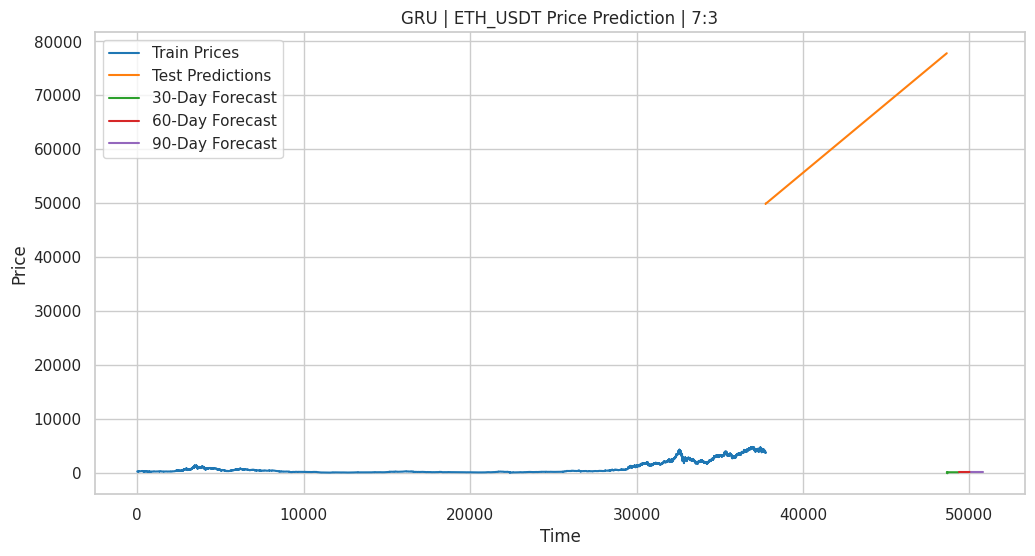

/home/duc-softzone/anaconda3/envs/rtfa/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - loss: 2545858.2500 - val_loss: 2382768.5000
Epoch 2/2
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 2384292.5000 - val_loss: 2138864.5000
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
(46, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

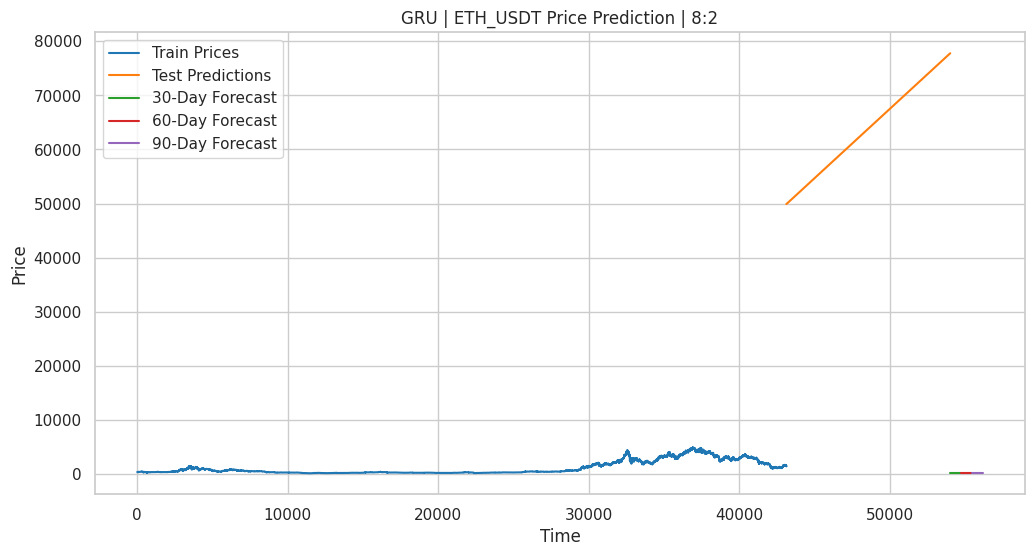

/home/duc-softzone/anaconda3/envs/rtfa/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1518/1518 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - loss: 2503399.5000 - val_loss: 2825226.0000
Epoch 2/2
1518/1518 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - loss: 2286969.5000 - val_loss: 2523550.7500
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
(46, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU

gru_models = {}
gru_evals = {}
for crypto in splitted_data.keys():
    crypto_evals = {}
    crypto_models = {}
    for i in range(len(scenarios)):
        train_df = splitted_data[crypto]['trains'][i]
        test_df = splitted_data[crypto]['tests'][i]
        X_train, y_train = prepare_dl_data(train_df)
        X_test, y_test = prepare_dl_data(test_df)
        gru_model = Sequential()
        gru_model.add(GRU(64, input_shape=((X_train.shape[1], X_train.shape[2]))))
        gru_model.add(Dense(1))
        gru_model.compile(optimizer='adam', loss='mean_squared_error')
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
        gru_history = gru_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
        predictions_gru = gru_model.predict(X_test)
        crypto_models[scenarios[i]] = gru_model
        crypto_evals[scenarios[i]] = eval(y_test, predictions_gru)
        forecast_plot('GRU', y_train, predictions, forecast_dl(crypto, 90, gru_model), crypto,scenarios[i], save=True)
    gru_evals[crypto] = crypto_evals
    gru_models[crypto] = crypto_models
    print(f'GRU | {crypto}')
display(pd.DataFrame(gru_evals))

### LSTM Model

In [ ]:
from tensorflow.keras.layers import LSTM
lstm_models = {}
lstm_evals = {}
for crypto in splitted_data.keys():
    crypto_evals = {}
    crypto_models = {}
    for i in range(len(scenarios)):
        train_df = splitted_data[crypto]['trains'][i]
        test_df = splitted_data[crypto]['tests'][i]
        X_train, y_train = prepare_dl_data(train_df)
        X_test, y_test = prepare_dl_data(test_df)
        lstm_model=Sequential()
        lstm_model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
        lstm_model.add(LSTM(50,return_sequences=True))
        lstm_model.add(LSTM(50))
        lstm_model.add(Dense(1))
        lstm_model.compile(loss='mean_squared_error',optimizer='adam')
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
        lstm_history = lstm_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
        predictions_lstm = lstm_model.predict(X_test)
        crypto_models[scenarios[i]] = lstm_model
        crypto_evals[scenarios[i]] = eval(y_test, predictions_lstm)
        forecast_plot('LSTM', y_train, predictions_lstm, forecast_dl(crypto, 90, lstm_model), crypto,scenarios[i], save=True)
    lstm_models[crypto] = crypto_models
    lstm_evals[crypto] = crypto_evals
display(pd.DataFrame(lstm_evals))


### RNN Model

In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN

from tensorflow.keras.layers import LSTM
rnn_models = {}
rnn_evals = {}
for crypto in splitted_data.keys():
    crypto_models = {}
    crypto_evals = {}
    for i in range(len(scenarios)):
        train_df = splitted_data[crypto]['trains'][i]
        test_df = splitted_data[crypto]['tests'][i]
        X_train, y_train = prepare_dl_data(train_df)
        X_test, y_test = prepare_dl_data(test_df)
        rnn_model = Sequential()
        rnn_model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
        rnn_model.add(Dense(1))
        rnn_model.compile(loss='mean_squared_error',optimizer='adam')
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
        rnn_history = rnn_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
        predictions_rnn = rnn_model.predict(X_test)
        crypto_evals[scenarios[i]] = eval(y_test, predictions_rnn)
        crypto_models[scenarios[i]] = rnn_model
    
    rnn_models[crypto] = crypto_models
    rnn_evals[crypto] = crypto_evals
display(pd.DataFrame(rnn_evals))




### ARIMA Model

In [804]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

arima_model = auto_arima(y_train, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=501215.217, Time=9.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=501262.755, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=501260.398, Time=1.65 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=501260.146, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=501262.035, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=501233.963, Time=2.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=501236.107, Time=2.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=501216.863, Time=13.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=501216.854, Time=13.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=501235.610, Time=10.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=501235.643, Time=6.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=501238.400, Time=12.92 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=501157.076, Time=46.95 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=501174.863, Time=14.86 sec

In [806]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                37052
Model:               SARIMAX(4, 1, 4)   Log Likelihood             -250549.589
Date:                Thu, 20 Jun 2024   AIC                         501119.179
Time:                        05:18:54   BIC                         501204.379
Sample:                             0   HQIC                        501146.244
                              - 37052                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2203      0.505      2.418      0.016       0.231       2.209
ar.L1          0.1863      0.023      8.116      0.000       0.141       0.231
ar.L2          0.7804      0.019     40.313      0.000       0.742       0.818
ar.L3          0.3196      0.014     22.123      0.000       0.291       0.348
ar.L4         -0.7623      0.016    -46.416      0.000      -0.794      -0.730
ma.L1         -0.2064      0.023     -8.909      0.000      -0.252      -0.161
ma.L2         -0.8076      0.019    -41.913      0.000      -0.845      -0.770
ma.L3         -0.2988      0.015    -20.399      0.000      -0.328      -0.270
ma.L4          0.7608      0.016     46.171      0.000       0.728       0.793
sigma2      4.384e+04     79.001    554.940      0.000    4.37e+04     4.4e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.18   Jarque-Bera (JB):           1775509.24
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               8.54   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

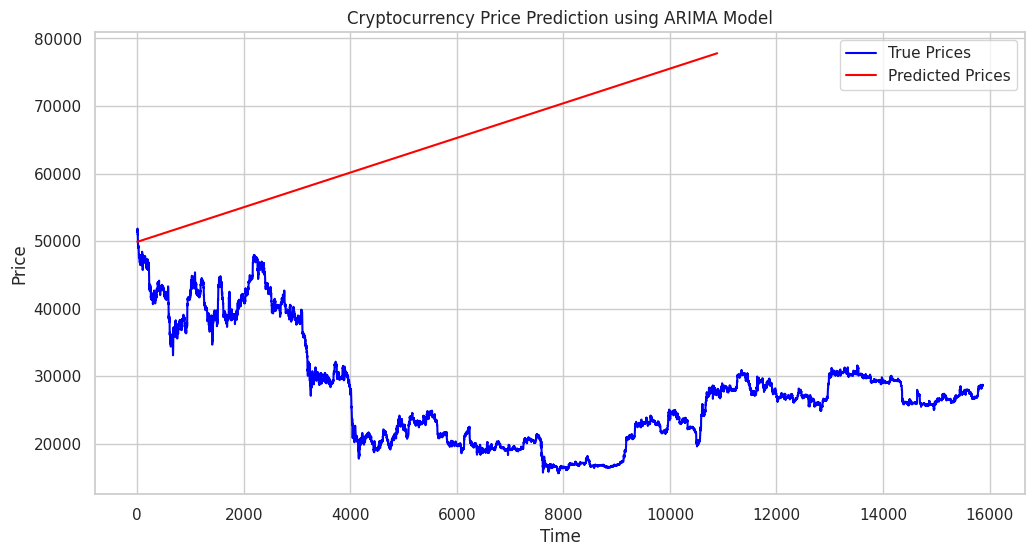

In [1075]:
predictions = model.predict(n_periods=len(test) + 90)

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='True Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Cryptocurrency Price Prediction using ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

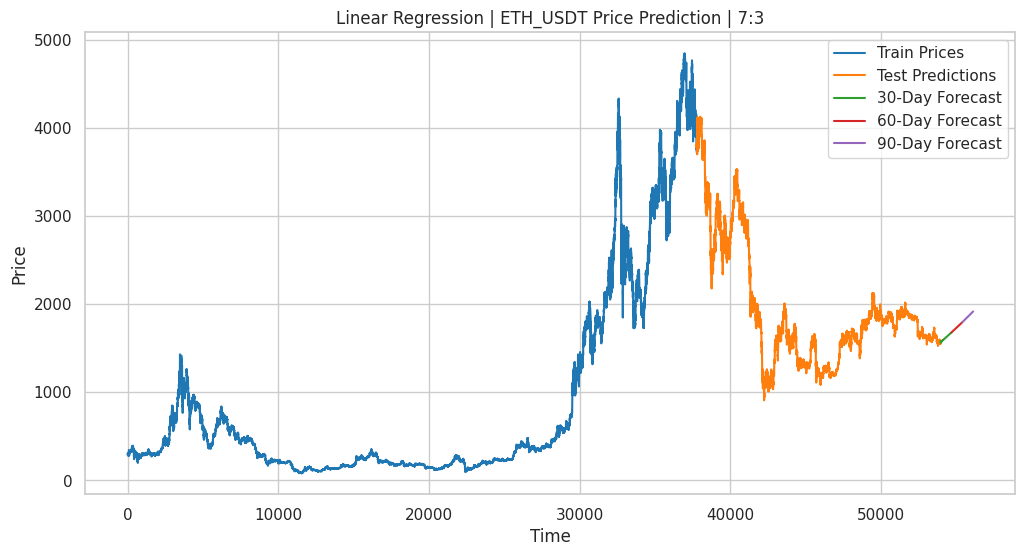

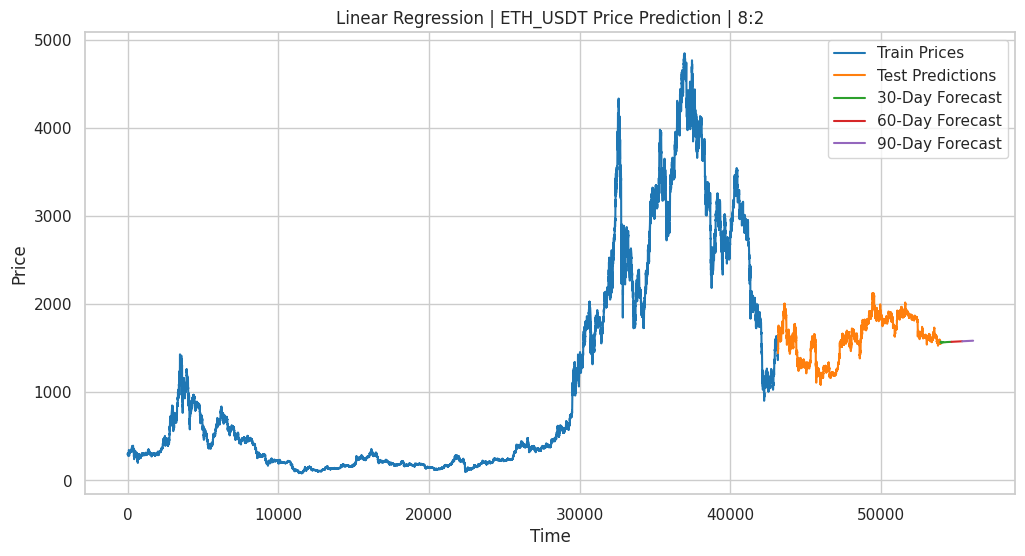

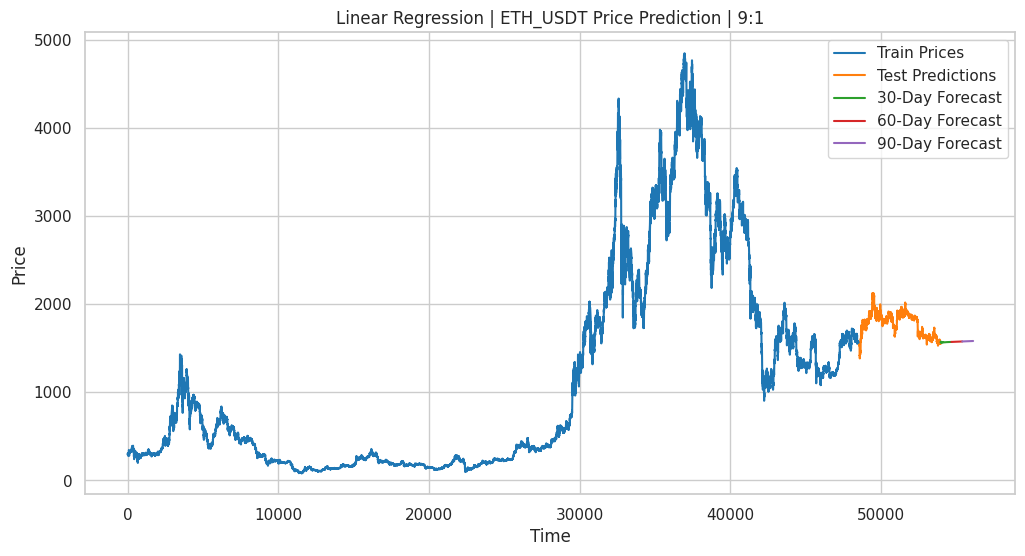

,7:3,8:2,9:1
MAE,9.639191,6.224745,5.287487
MAPE,0.496618,0.389740,0.296909
RMSE,16.202629,10.212502,8.795343
WAPE,0.500272,0.383797,0.296890
R2,0.999433,0.998061,0.995432


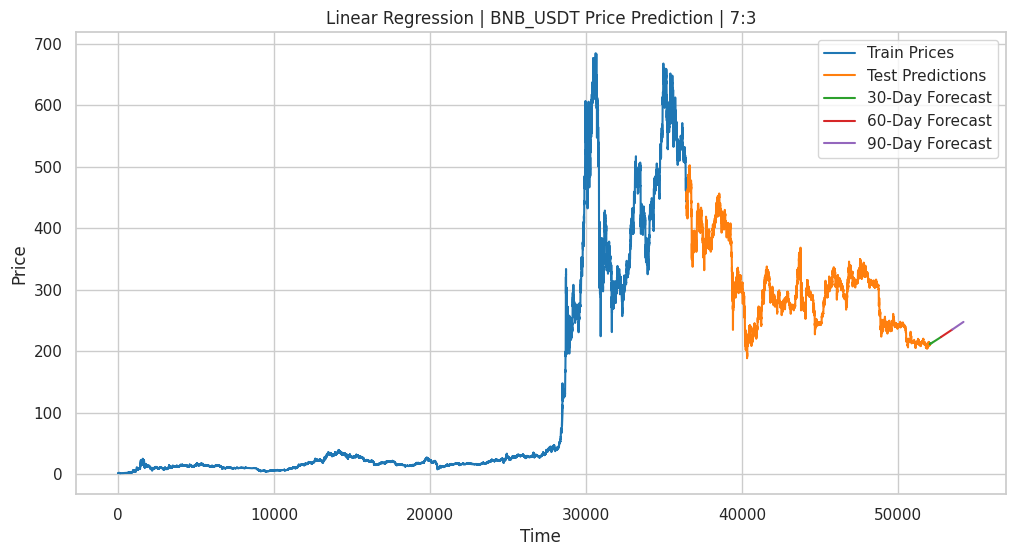

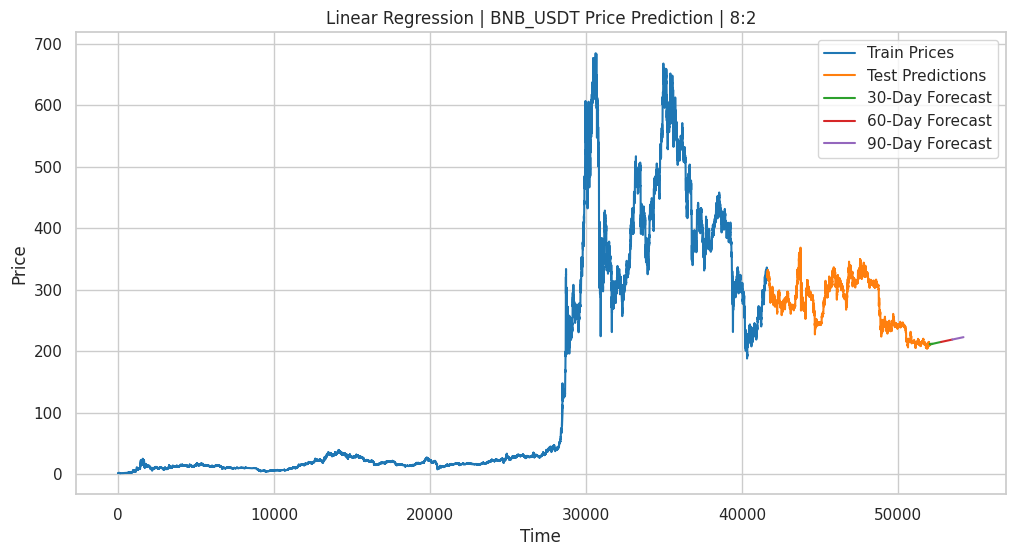

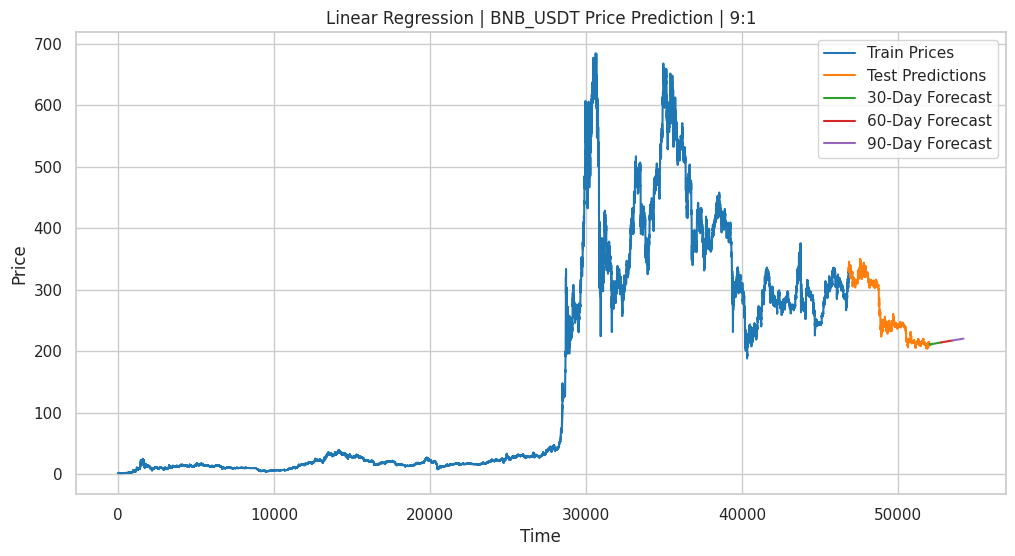

,7:3,8:2,9:1
MAE,1.405682,1.041129,0.783413
MAPE,0.460285,0.370321,0.295654
RMSE,2.307997,1.789158,1.312673
WAPE,0.469696,0.377806,0.298172
R2,0.998680,0.997838,0.999177


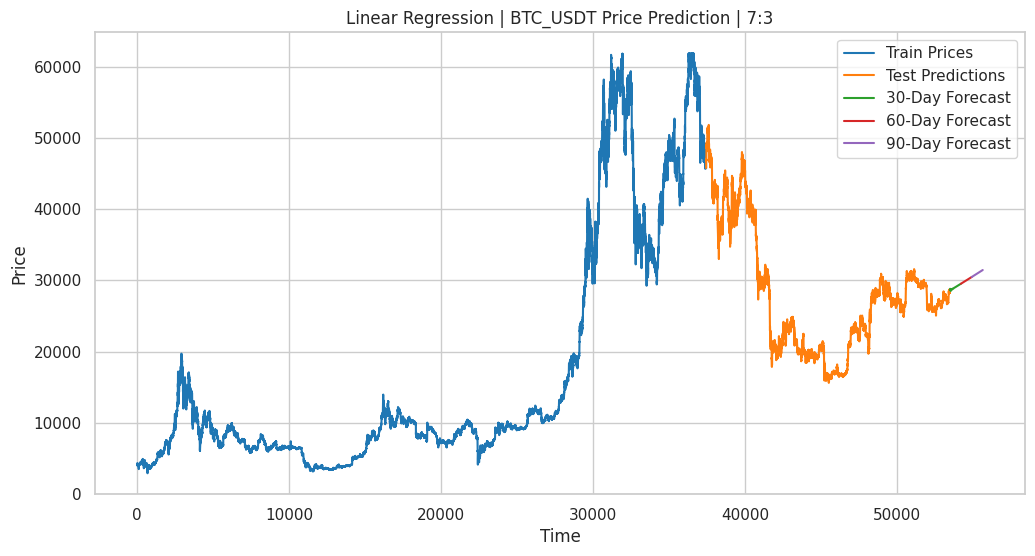

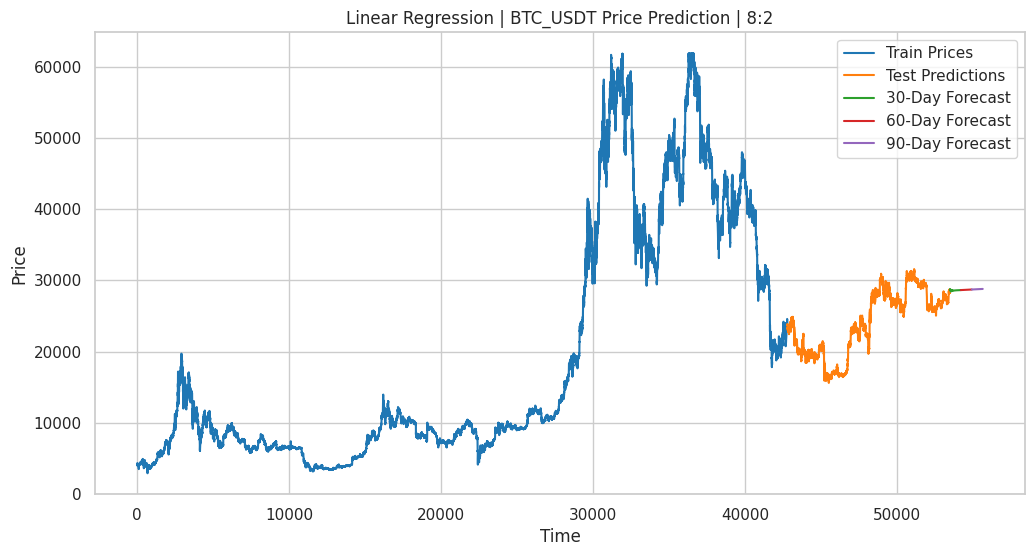

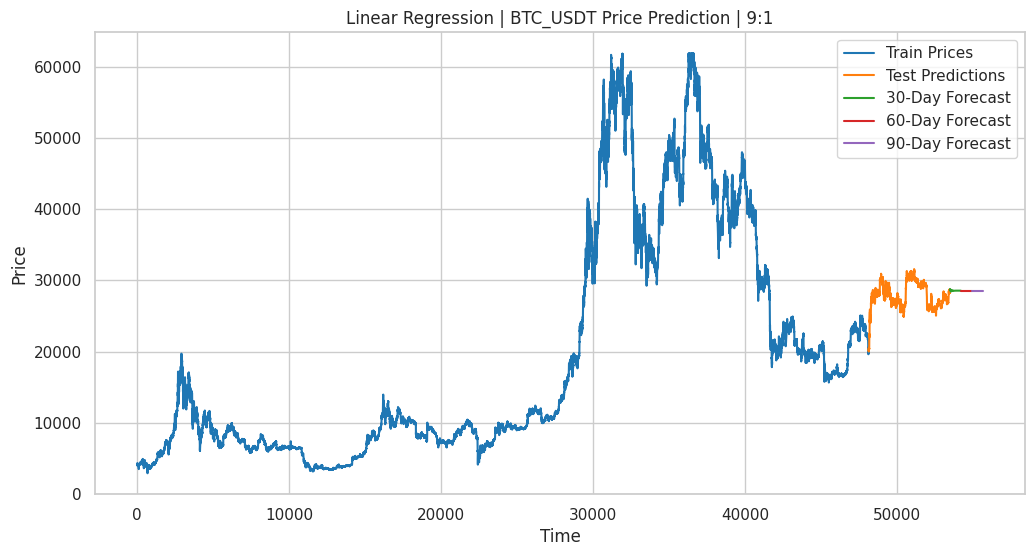

,7:3,8:2,9:1
MAE,108.920452,72.259820,75.738651
MAPE,0.384116,0.305916,0.273416
RMSE,183.964406,121.324869,127.915245
WAPE,0.392020,0.301510,0.271860
R2,0.999517,0.999263,0.994675


In [1266]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

lr_models = []
lr_evals = {}
for crypto in splitted_data.keys():
    for i in range(len(scenarios)):
        train_df = splitted_data[crypto]['trains'][i]
        test_df = splitted_data[crypto]['tests'][i]
        
        X_train_lr, y_train_lr = prepare_ml_data(train_df)
        X_test_lr, y_test_lr = prepare_ml_data(test_df)
        lr_model = LinearRegression()
        lr_model.fit(X_train_lr, y_train_lr)
        
        predictions_lr = lr_model.predict(X_test_lr.reshape(X_test_lr.shape[0], -1))
        lr_evals[scenarios[i]] = eval(y_test_lr, predictions_lr)
        forecast_plot('Linear Regression', y_train_lr, predictions_lr, forecast_ml(crypto, 90, lr_model), crypto,scenarios[i], save=True)
    
    display(pd.DataFrame(lr_evals))

In [1105]:
def forecast_ml(crypto, n_days, model):
    forecast = []
    last_known_period = df_dict[crypto].iloc[-config['MODEL']['INTERVAL'] * 24:]
    last_known_data = pipeline_dict[crypto].transform(last_known_period).iloc[[-1]]
    for i in range(n_days * 24):
        next_pred = model.predict(last_known_data.drop('C', axis=1).values)[0]
        forecast.append(next_pred)
        last_known_period = pd.concat([last_known_period, pd.DataFrame({'C': [next_pred]})], ignore_index=True)
        last_known_data = pipeline_dict[crypto].transform(last_known_period).iloc[[-1]]
    
    forecast = np.array(forecast)
    return forecast

In [1262]:
def forecast_dl(crypto, n_days, model):
    forecast = []

    last_known_period = df_dict[crypto].iloc[-46:].copy()
    print(last_known_period.shape)
    last_known_data = pipeline_dict[crypto].transform(last_known_period)
    for i in range(n_days * 24):
        features = last_known_data.drop(columns=['C'])
        X = []
        for i in range(len(last_known_data) - config['MODEL']['WINDOW_SIZE'] - config['MODEL']['PREDICT_STEP']):
            X.append(features.iloc[i:i+config['MODEL']['WINDOW_SIZE']].values)
        X = np.array(X)
        next_pred = model.predict(X)
        
        forecast.append(next_pred[0][0])
        last_known_period = pd.concat([last_known_period, pd.DataFrame({'C': [next_pred]})], ignore_index=True)
        last_known_period = last_known_period.iloc[1:]
        last_known_data = pipeline_dict[crypto].transform(last_known_period)

    forecast = np.array(forecast)
    return forecast

In [1053]:
df_dict['BTC_USDT']

,O,H,L,C,V
Date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2023-10-19 19:00:00,28646.98,28765.76,28645.00,28750.75,1039.209350
2023-10-19 20:00:00,28750.75,28882.07,28684.80,28715.38,1737.147110
2023-10-19 21:00:00,28715.39,28739.73,28604.09,28604.09,1118.516970


In [1267]:
def forecast_plot(model_name, train_prices, test_prices, f90_prices, crypto, scenario, save=False):
    train_time = np.arange(len(train_prices))
    test_time = np.arange(len(train_prices), len(train_prices) + len(test_prices))
    d30_time = np.arange(len(train_prices) + len(test_prices), len(train_prices) + len(test_prices) + 30*24)
    d60_time = np.arange(len(train_prices) + len(test_prices) + 30*24, len(train_prices) + len(test_prices) + 60*24)
    d90_time = np.arange(len(train_prices) + len(test_prices) + 60*24, len(train_prices) + len(test_prices) + len(f90_prices))
    plt.figure(figsize=(12, 6))
    plt.plot(train_time, train_prices, label='Train Prices', color='#1f77b4')
    plt.plot(test_time, test_prices, label='Test Predictions', color='#ff7f0e')
    plt.plot(d30_time, f90_prices[:30 * 24], label='30-Day Forecast', color='#2ca02c')
    plt.plot(d60_time, f90_prices[30 * 24:60 * 24], label='60-Day Forecast', color='#d62728')
    plt.plot(d90_time, f90_prices[60 * 24:], label='90-Day Forecast', color='#9467bd')
    plt.title(f'{model_name} | {crypto} Price Prediction | {scenario}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    if save:
        plt.savefig(f'{model_name}/{model_name} | {crypto} Price Prediction | {scenario}')
    
    plt.show()
